<a href="https://colab.research.google.com/github/naufalnashif/sentiment-analysis-biskita/blob/main/scraping_tweets_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
from tqdm.notebook import tqdm

pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 50]


## Get tweets using keyword 'biskita' and 'transpakuan'
-  Since 26 Jun 2022 until 25 Jun 2023

In [ ]:

scrapper = sntwitter.TwitterSearchScraper("biskita until:2023-06-25 since:2022-06-26")

tweets = []
n_tweets = 4_000
for i,tweet in tqdm(enumerate(scrapper.get_items()), total=n_tweets):
  data = [
    tweet.date,
    tweet.id,
    tweet.rawContent,
    tweet.user.username,
    tweet.likeCount,
    tweet.retweetCount,
  ]
  tweets.append(data)
  if i > n_tweets :
    break

df_bis_2023 = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count" ]
)
df_bis_2023.to_csv('Biskita_2023.csv')

In [ ]:
scrapper = sntwitter.TwitterSearchScraper("trans pakuan until:2023-06-25 since:2022-06-26")

tweets = []
n_tweets = 4_000
for i,tweet in tqdm(enumerate(scrapper.get_items()), total=n_tweets):
  data = [
    tweet.date,
    tweet.id,
    tweet.rawContent,
    tweet.user.username,
    tweet.likeCount,
    tweet.retweetCount,
  ]
  tweets.append(data)
  if i > n_tweets :
    break

df_trans_2023 = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count" ]
)
df_trans_2023.to_csv('Transpakuan_2023.csv')

## Append the data

In [ ]:
df = df_bis_2023.append(df_trans_2023)

<ipython-input-8-dc12600eff31>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_bis_2023.append(df_trans_2023)


In [ ]:
print(df.shape)
print(df_bis_2023.shape)
print(df_trans_2023.shape)

(4306, 6)
(3500, 6)
(806, 6)


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head()

,date,id,content,username,like_count,retweet_count
0,2023-06-24 23:02:44+00:00,1672742080010133505,"@junehokiw @bogorfess_ kurangg tau kalo itu, cuman barusan gua abis dari luar udaa ada biskita dijalanan.",mengsanss,0,0
1,2023-06-24 22:45:38+00:00,1672737774288654337,[bgr] biskita jam segini udah ada belum guys??,bogorfess_,1,1
2,2023-06-24 14:59:42+00:00,1672620519907262466,angkot berguna soalnya yakali lu dr bogor ampe cangkrang mau JALAN KAKI mikir dah mnurut gw mah mau pake biskita emg biskita muat lewat nagrak💀💀💀💀 ngakak anyinh,ayangwendy,0,0
3,2023-06-24 14:39:07+00:00,1672615338356379649,[bgr] bayar biskita bisa pake kartu apa aja ya??,bogorfess_,1,0
4,2023-06-24 13:24:14+00:00,1672596495693139975,@bogorfess_ Caranya gimana min?? Aku mau nanya seputat biskita nihh :',hottaekk,0,0


<Axes: title={'center': 'Counts of Tweet'}>

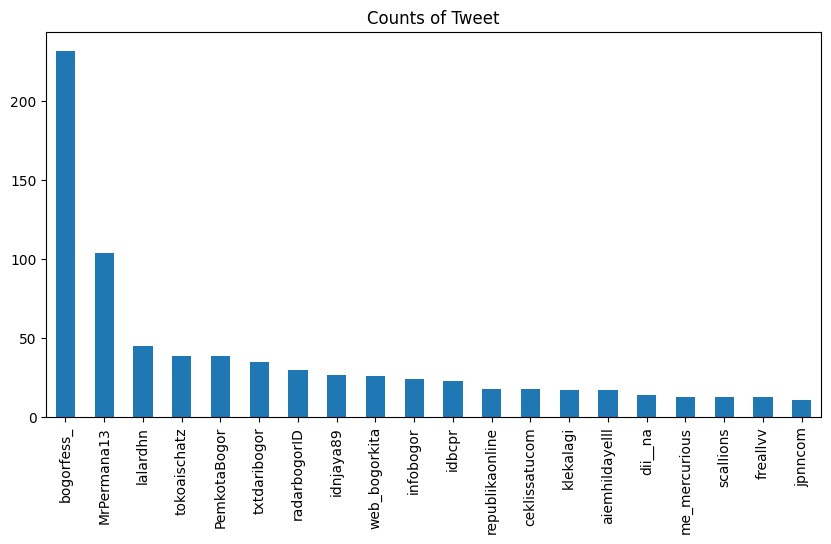

In [ ]:
df['username'].value_counts().head(20).plot(kind = 'bar', title = 'Counts of Tweet', figsize = (10,5))

## Remove Duplicate Tweets based on 'Content'

In [ ]:
df_drop = df.drop_duplicates(subset = ['content'])

In [ ]:
print('Sebelum drop duplicates : {} tweets'.format(len(df)))
print('Sesudah drop duplicates : {} tweets'.format(len(df_drop)))
print('Total tweet terhapus : {} tweets'.format(len(df) - len(df_drop)))

Sebelum drop duplicates : 4306 tweets
Sesudah drop duplicates : 4094 tweets
Total tweet terhapus : 212 tweets


<Axes: title={'center': 'Counts of Tweet'}>

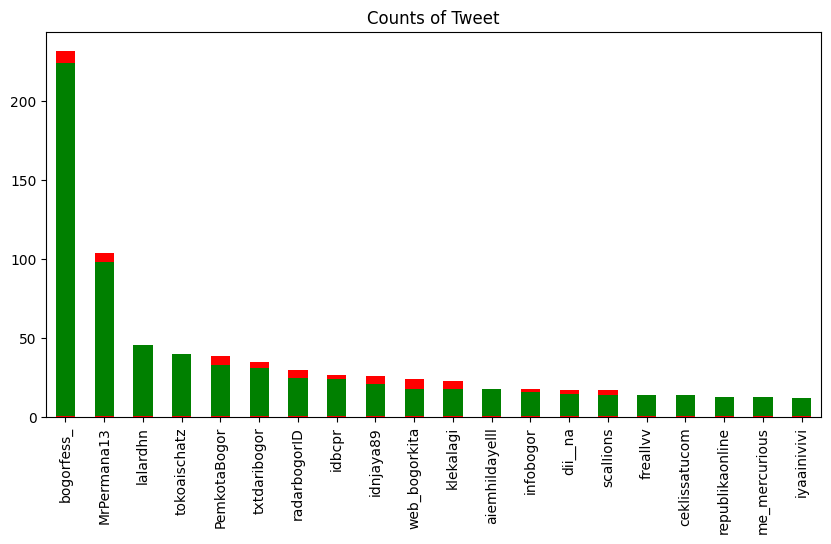

In [ ]:
df['username'].value_counts().head(20).plot(kind = 'bar', title = 'Counts of Tweet', figsize = (10,5), color = 'r')
df_drop['username'].value_counts().head(20).plot(kind = 'bar', title = 'Counts of Tweet', figsize = (10,5), bottom = True, color = 'g')

In [ ]:
df_dupl = df[df.duplicated(subset = ['content'])]
df_dupl

,date,id,content,username,like_count,retweet_count
10,2023-06-23 15:15:39+00:00,1672262147097919489,"halo kakak2 yg domisili kota bogor atau kerja di kota bogor, boleh minta waktunya sebentar untuk bantu isi kuesioner penelitian aku? terimakasih sebelumnya🫶✨\n\nlink kuesioner :\n\nhttps://t.co/xGRsyPoRTj\n\n#kuesioner #transportasi #transportasiumum #kotabogor #bogorkota #biskita",agapatri,0,0
866,2023-04-10 05:49:41+00:00,1645303012242640897,"[bgr] mau nanya dong, biskita masih gratis atau udah mulai berbayar ya?",bogorfess_,1,0
893,2023-04-05 15:39:24+00:00,1643639483219230722,"[bgr] mau nanya dong, biskita masih gratis atau udah mulai berbayar ya?",bogorfess_,0,0
982,2023-04-01 04:06:19+00:00,1642015510362738690,"@bogorfess_ sorry oot, ada yg tau cara naik biskita dari halte smkn3 ke stasiun bogor? aplikasi biskita dari tadi buffering terus, thanks guys",paboppaa,0,0
1387,2023-02-07 08:10:01+00:00,1622870280950673411,[bgr] biskita masih gratis kan ya?,bogorfess_,2,0
...,...,...,...,...,...,...
769,2022-07-15 23:41:07+00:00,1548090312605675524,Layanan Biskita Trans Pakuan yang melayani empat koridor saat ini masih bisa dimanfaatkan masyarakat Bogor secara gratis. https://t.co/Xd973mkd7T,kompascom,3,0
796,2022-06-30 07:18:29+00:00,1542407206511218689,"sama kaya biskita transpakuan ya ini, mantap bgt emang sampe skrg aja masi gratis. jadi gue kalo mau ke mall di bogor ongkosnya ga gede shayy💓",dimplestyongie,0,0
797,2022-06-30 04:04:11+00:00,1542358312276348929,@PemkotaBogor mo tanya untuk naik transpakuan/biskita bayar bisa pakai e-money?,luki_lm,0,0
799,2022-06-29 11:35:30+00:00,1542109501448667136,"Gokil, nunggu biskita transpakuan dateng sampe 30 menit lebih belum ada juga. 👍\nAplikasinya juga gak on time waktunya. Masih banyak yang perlu dibenahi, Pak @BimaAryaS. 🙏",ddeearx,0,0


In [ ]:
df[df['content'] == 'Pemkot Bogor Kaji Tiket Terusan, Biskita Transpakuan Masih Gratis | https://t.co/jrem9yGM7s']

,date,id,content,username,like_count,retweet_count
1665,2023-01-05 11:17:48+00:00,1610958739447619585,"Pemkot Bogor Kaji Tiket Terusan, Biskita Transpakuan Masih Gratis | https://t.co/jrem9yGM7s",inilahkorancom,0,0
403,2023-01-05 11:17:48+00:00,1610958739447619585,"Pemkot Bogor Kaji Tiket Terusan, Biskita Transpakuan Masih Gratis | https://t.co/jrem9yGM7s",inilahkorancom,0,0


In [ ]:
df[df['content'] == 'Tarif Biskita Transpakuan Diusulkan Rp5.500, Pemkot Kaji Tiket Terusan https://t.co/WcU10NgIRO']

,date,id,content,username,like_count,retweet_count
1670,2023-01-05 07:48:58+00:00,1610906186353872898,"Tarif Biskita Transpakuan Diusulkan Rp5.500, Pemkot Kaji Tiket Terusan https://t.co/WcU10NgIRO",radarbogorID,0,0
408,2023-01-05 07:48:58+00:00,1610906186353872898,"Tarif Biskita Transpakuan Diusulkan Rp5.500, Pemkot Kaji Tiket Terusan https://t.co/WcU10NgIRO",radarbogorID,0,0


## Get the xlsx file

In [ ]:
# Convert datetime column to timezone-unaware
df_drop['date'] = df_drop['date'].dt.tz_localize(None)

df_drop.to_excel("bis_trans-2023.xlsx", index=False)

<ipython-input-17-27e826973ee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['date'] = df_drop['date'].dt.tz_localize(None)
